In [3]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df_tweets_sentiment = pd.read_pickle('data/ap_tweets_classified_sentiment.pkl')

In [5]:
df_tweets_sentiment = df_tweets_sentiment[df_tweets_sentiment.sentiment != 'neu']
df_tweets_sentiment = pd.merge(df_tweets_sentiment, pd.get_dummies(df_tweets_sentiment.sentiment), left_index=True, right_index=True)
df_tweets_sentiment_us = df_tweets_sentiment[df_tweets_sentiment.place_country_code == 'US']
df_hillary = df_tweets_sentiment_us[(df_tweets_sentiment_us.about == 1)]
df_hillary['created_at'] = pd.to_datetime(df_hillary['created_at'])
df_trump = df_tweets_sentiment_us[(df_tweets_sentiment_us.about == 0)]
df_trump['created_at'] = pd.to_datetime(df_trump['created_at'])

/home/zenbook/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/zenbook/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [12]:
# Change these dates (both dates are included)
date_from = '2016-08-30' #included
date_to = '2016-09-03' #not included

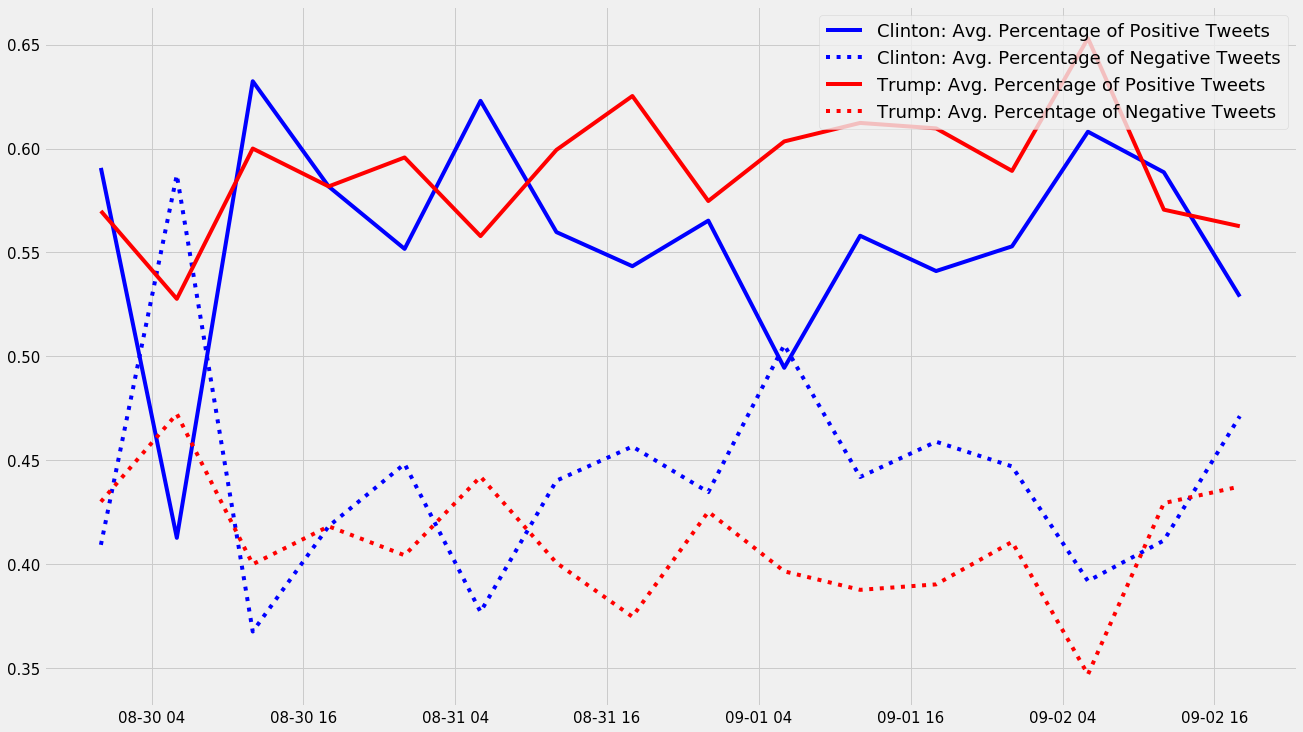

In [13]:
df_hillary_set_index = df_hillary[(df_hillary['created_at'] >= date_from) & (df_hillary['created_at'] < date_to)]
df_hillary_set_index = df_hillary_set_index.set_index('created_at')
df_trump_set_index = df_trump[(df_trump['created_at'] >= date_from) & (df_trump['created_at'] < date_to)]
df_trump_set_index = df_trump_set_index.set_index('created_at')
df_time_hillary_pos = df_hillary_set_index.resample('6h').mean().pos #hillary positive
df_time_hillary_neg = df_hillary_set_index.resample('6h').mean().neg #hillary positive
df_trump_pos = df_trump_set_index.resample('6h').mean().pos #trump positive
df_trump_neg = df_trump_set_index.resample('6h').mean().neg #trump positive

plt.figure(figsize=(20,12))

plt.style.use('fivethirtyeight')

plt.tick_params(labelsize=15)

plt.plot(df_time_hillary_pos, label='Clinton: Avg. Percentage of Positive Tweets', color='blue')
plt.plot(df_time_hillary_neg, ':', label='Clinton: Avg. Percentage of Negative Tweets', color='blue')

plt.plot(df_trump_pos, label='Trump: Avg. Percentage of Positive Tweets', color='red')
plt.plot(df_trump_neg, ':', label='Trump: Avg. Percentage of Negative Tweets', color='red')

plt.legend(loc=1, prop={'size': 18})